In [20]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
import time
import tracemalloc

# Take the input data

In [21]:
df = pd.read_csv("C:/Users/villu/Desktop/SEM-1/LearningSystems/Project/Project-3/datasets/car.data", on_bad_lines='skip', skiprows=1, header=None)
df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


# Class Distribution

<AxesSubplot: xlabel='6', ylabel='count'>

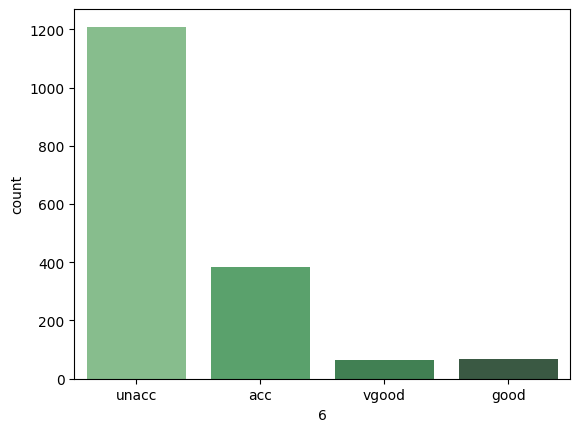

In [22]:
columnsList=[]
for col in df.columns:
    columnsList.append(col)
n=len(columnsList)
labels=columnsList[n-1]
sns.countplot(x=labels, data=df, palette="Greens_d")

# Data preprocessing

### Missing values imputation

In [23]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [24]:
df=df.fillna(df.mean())

C:\Users\villu\AppData\Local\Temp\ipykernel_26188\3358723971.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


### Exploratory Data Analysis 

In [25]:
df.describe()

,0,1,2,3,4,5,6
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


### Feature Tranformation

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for i in df.columns:
    df[i] = labelencoder.fit_transform(df[i])
df.head()

,0,1,2,3,4,5,6
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


### Creating a correlation matrix 

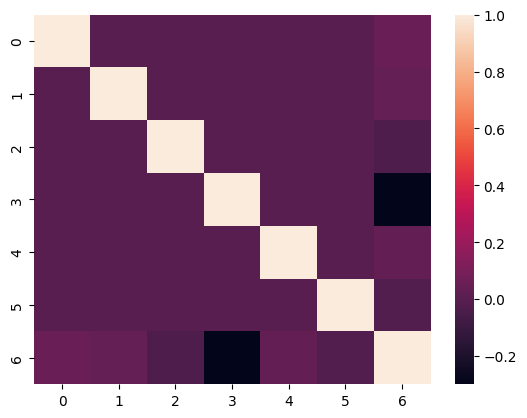

In [27]:
corr_matrix=df.corr()
dataplot=sns.heatmap(corr_matrix)  
plt.show()

### Identifying highly correlated features in the dataframe 

In [28]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

C:\Users\villu\AppData\Local\Temp\ipykernel_26188\1148681382.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


### Dropping highly correlated features in the dataframe

In [29]:
# Drop features 
df.drop(df[to_drop], axis=1)

,0,1,2,3,4,5,6
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


# Implementation

## Train-Test Split 

In [30]:
cols= X = df.iloc[:, :-1]
X = df.drop(labels,axis=1)
Y = df[labels]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=143)

## Classification Models

In [31]:
import xgboost as xgb

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from gosdt import GOSDT
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


In [33]:
config = {
            "regularization": 0.02, # regularization penalizes the tree with more leaves. We recommend to set it to relative high value to find a sparse tree.  
            "depth_budget": 6,
            "time_limit": 60, # training time limit in seconds
            "similar_support": False
        }

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),   
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(), 
    XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5),
    #GOSDT(config)
    ]   

## Test the classification models

In [34]:
accuracyScores=[]
precisionScores=[]
recallScores=[]
f1Scores=[]
classifierNames=[]
executionTimes=[]
memoryUsage=[]
modelNames=[]
for clf in classifiers:
    start=time.time()
    tracemalloc.start()
    clf.fit(X_train, Y_train)
    print("-"*60)
    modelName=clf.__class__.__name__
    Y_pred = clf.predict(X_test) 
    accuracyScore=round(accuracy_score(Y_test, Y_pred)*100,2)
    precisionScore=round(precision_score(Y_test, Y_pred,average="macro")*100,2)
    recallScore=round(recall_score(Y_test, Y_pred,average="macro")*100,2)
    f1Score=round(f1_score(Y_test, Y_pred, average="macro")*100,2)
    print("**"+modelName+"**")
    print("Accuracy: ",accuracyScore)
    accuracyScores.append(accuracyScore)
    precisionScores.append(precisionScore)
    recallScores.append(recallScore)
    f1Scores.append(f1Score)
    end=time.time()   
    executionTimes.append((end-start) * 10**3)  
    print("The time of execution of",modelName, "is :",(end-start) * 10**3, "ms")
    memory=tracemalloc.get_traced_memory()
    tracemalloc.stop()
    print("The Memory utilized for",modelName, "is :",memory[0],"KB")
    memoryUsage.append(memory[0])
    print(classification_report(Y_test,Y_pred))
    classifierNames.append(clf.__class__.__name__)
print("-"*60)

------------------------------------------------------------
**LogisticRegression**
Accuracy:  71.1
The time of execution of LogisticRegression is : 104.50506210327148 ms
The Memory utilized for LogisticRegression is : 107221 KB
              precision    recall  f1-score   support

           0       0.35      0.23      0.28        66
           1       0.00      0.00      0.00        17
           2       0.77      0.93      0.84       246
           3       0.60      0.18      0.27        17

    accuracy                           0.71       346
   macro avg       0.43      0.33      0.35       346
weighted avg       0.64      0.71      0.66       346

------------------------------------------------------------
**DecisionTreeClassifier**
Accuracy:  96.82
The time of execution of DecisionTreeClassifier is : 17.606019973754883 ms
The Memory utilized for DecisionTreeClassifier is : 4990 KB
              precision    recall  f1-score   support

           0       0.90      0.97      0.

C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

------------------------------------------------------------
**SVC**
Accuracy:  71.1
The time of execution of SVC is : 489.83287811279297 ms
The Memory utilized for SVC is : 69387 KB
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        66
           1       0.00      0.00      0.00        17
           2       0.71      1.00      0.83       246
           3       0.00      0.00      0.00        17

    accuracy                           0.71       346
   macro avg       0.18      0.25      0.21       346
weighted avg       0.51      0.71      0.59       346

------------------------------------------------------------
**GaussianNB**
Accuracy:  69.36
The time of execution of GaussianNB is : 15.63405990600586 ms
The Memory utilized for GaussianNB is : 6756 KB
              precision    recall  f1-score   support

           0       0.61      0.17      0.26        66
           1       0.00      0.00      0.00        17
           2    

C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

------------------------------------------------------------
**RandomForestClassifier**
Accuracy:  96.24
The time of execution of RandomForestClassifier is : 977.1649837493896 ms
The Memory utilized for RandomForestClassifier is : 81996 KB
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        66
           1       1.00      0.82      0.90        17
           2       1.00      0.98      0.99       246
           3       1.00      0.82      0.90        17

    accuracy                           0.96       346
   macro avg       0.96      0.90      0.93       346
weighted avg       0.97      0.96      0.96       346

------------------------------------------------------------
**AdaBoostClassifier**
Accuracy:  74.28
The time of execution of AdaBoostClassifier is : 363.19637298583984 ms
The Memory utilized for AdaBoostClassifier is : 42122 KB
              precision    recall  f1-score   support

           0       0.40      0.62      0.

C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\villu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

------------------------------------------------------------
**GradientBoostingClassifier**
Accuracy:  96.53
The time of execution of GradientBoostingClassifier is : 1323.4386444091797 ms
The Memory utilized for GradientBoostingClassifier is : 172302 KB
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        66
           1       0.83      0.88      0.86        17
           2       1.00      0.97      0.99       246
           3       1.00      0.82      0.90        17

    accuracy                           0.97       346
   macro avg       0.93      0.92      0.92       346
weighted avg       0.97      0.97      0.97       346

------------------------------------------------------------
**XGBClassifier**
Accuracy:  96.82
The time of execution of XGBClassifier is : 1225.2776622772217 ms
The Memory utilized for XGBClassifier is : 20292 KB
              precision    recall  f1-score   support

           0       0.88      0.98      0.9

### Classifiers vs Accuracy Scores

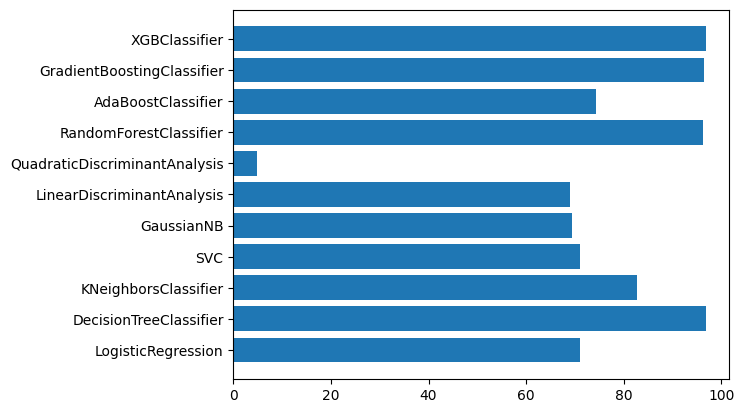

In [35]:
Y_Axis = classifierNames
plt.barh(Y_Axis, accuracyScores)
plt.yticks(Y_Axis, classifierNames)
plt.show()

###  Classifiers vs Execution Times

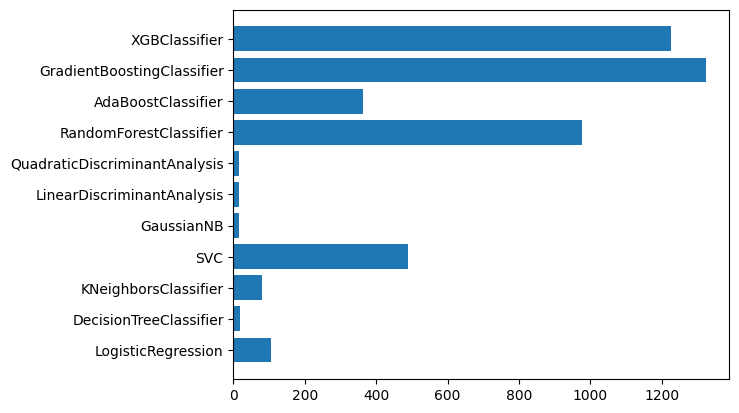

In [36]:
Y_Axis = classifierNames
plt.barh(Y_Axis, executionTimes)
plt.yticks(Y_Axis, classifierNames)
plt.show()

### Classifiers vs Memory Usage

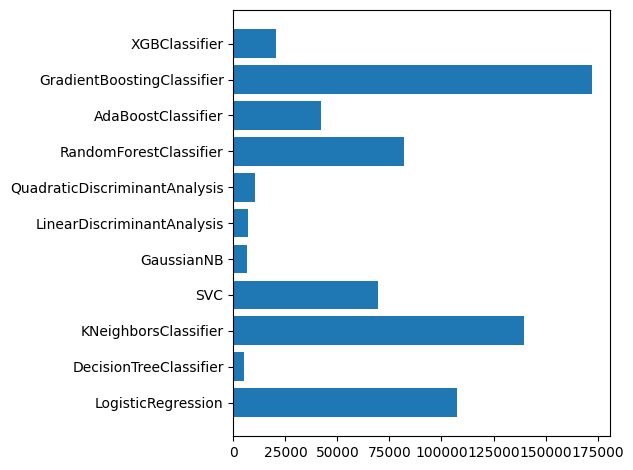

In [37]:
Y_Axis = classifierNames
plt.barh(Y_Axis, memoryUsage)
plt.yticks(Y_Axis, classifierNames)
plt.tight_layout()
plt.show()

### Get Ranks of Each Model

In [38]:
import operator
accuracyRank={}
precisionRank={}
recallRank={}
f1Rank={}
executionRank={}
memoryRank={}
modelsCount=len(classifierNames)
##Calculating Accuracy Rank
for i in range(modelsCount):
    accuracyRank[classifierNames[i]]=accuracyScores[i]
sortedScore=dict(sorted(accuracyRank.items(), key=operator.itemgetter(1),reverse=True))
Rank=1
for i in sortedScore.keys():
    accuracyRank[i]=Rank
    Rank=Rank+1
##Calculating Precision Rank
for i in range(modelsCount):
    precisionRank[classifierNames[i]]=precisionScores[i]
sortedScore=dict(sorted(precisionRank.items(), key=operator.itemgetter(1),reverse=True))
Rank=1
for i in sortedScore.keys():
    precisionRank[i]=Rank
    Rank=Rank+1
##Calculating Recall Rank
for i in range(modelsCount):
    recallRank[classifierNames[i]]=recallScores[i]
sortedScore=dict(sorted(recallRank.items(), key=operator.itemgetter(1),reverse=True))
Rank=1
for i in sortedScore.keys():
    recallRank[i]=Rank
    Rank=Rank+1
##Calculating f1-score Rank
for i in range(modelsCount):
    f1Rank[classifierNames[i]]=f1Scores[i]
sortedScore=dict(sorted(f1Rank.items(), key=operator.itemgetter(1),reverse=True))
Rank=1
for i in sortedScore.keys():
    f1Rank[i]=Rank
    Rank=Rank+1
##Calculating Execution Time Rank
for i in range(modelsCount):
    executionRank[classifierNames[i]]=executionTimes[i]
sortedScore=dict(sorted(executionRank.items(), key=operator.itemgetter(1)))
Rank=1
for i in sortedScore.keys():
    executionRank[i]=Rank
    Rank=Rank+1
##Calculating Memory Usage Rank
for i in range(modelsCount):
    memoryRank[classifierNames[i]]=memoryUsage[i]
sortedScore=dict(sorted(memoryRank.items(), key=operator.itemgetter(1)))
Rank=1
for i in sortedScore.keys():
    memoryRank[i]=Rank
    Rank=Rank+1
##Calculating Overall Rank
overallRank={}
for i in classifierNames:
    overallRank[i]=(accuracyRank[i]+precisionRank[i]+recallRank[i]+f1Rank[i])/4
sortedScore=dict(sorted(overallRank.items(), key=operator.itemgetter(1)))
Rank=1
for i in sortedScore.keys():
    overallRank[i]=Rank
    Rank=Rank+1
sortedOverallRank=dict(sorted(overallRank.items(), key=operator.itemgetter(1)))
print(sortedOverallRank)
bestModel=str(next(iter(sortedOverallRank)))
print("The Best Model for the given Dataset is",bestModel)

{'XGBClassifier': 1, 'RandomForestClassifier': 2, 'GradientBoostingClassifier': 3, 'DecisionTreeClassifier': 4, 'KNeighborsClassifier': 5, 'AdaBoostClassifier': 6, 'LogisticRegression': 7, 'GaussianNB': 8, 'LinearDiscriminantAnalysis': 9, 'SVC': 10, 'QuadraticDiscriminantAnalysis': 11}
The Best Model for the given Dataset is XGBClassifier
